In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 6)

In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#count the value
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

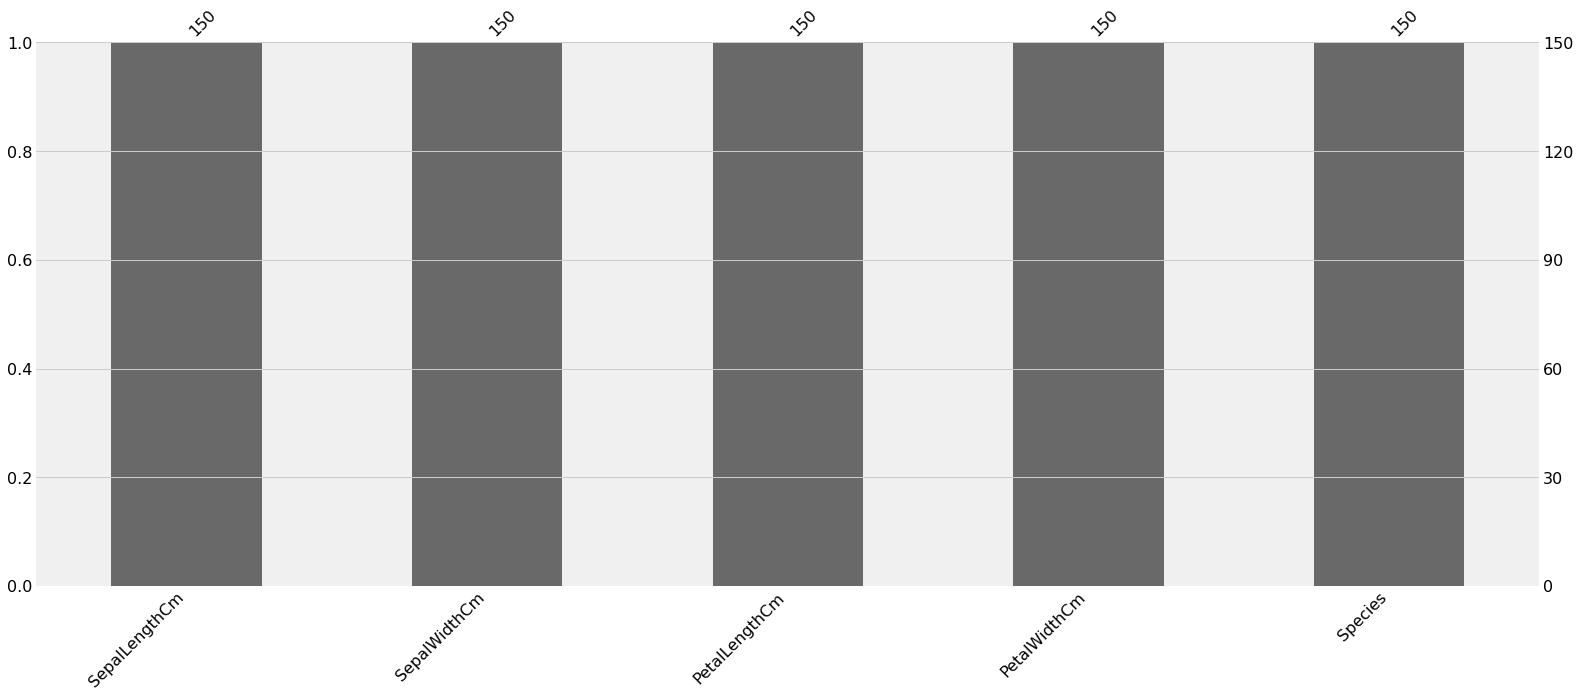

In [11]:
import missingno as msno
msno.bar(df)

In [12]:
df.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

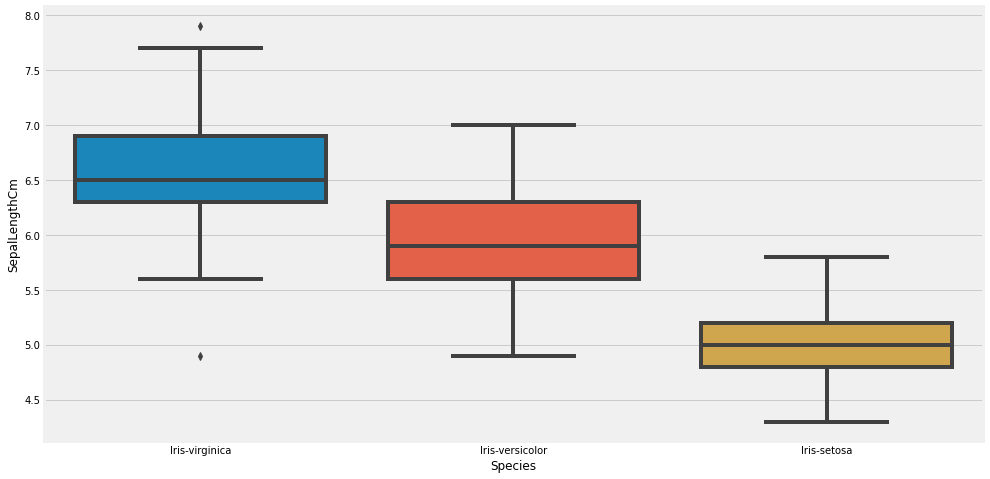

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

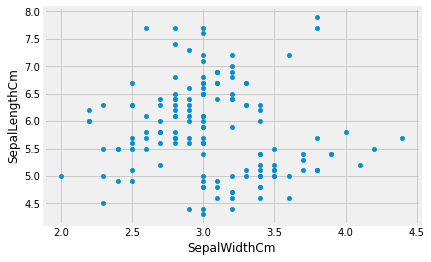

In [14]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

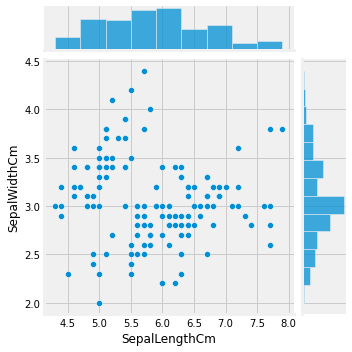

In [15]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

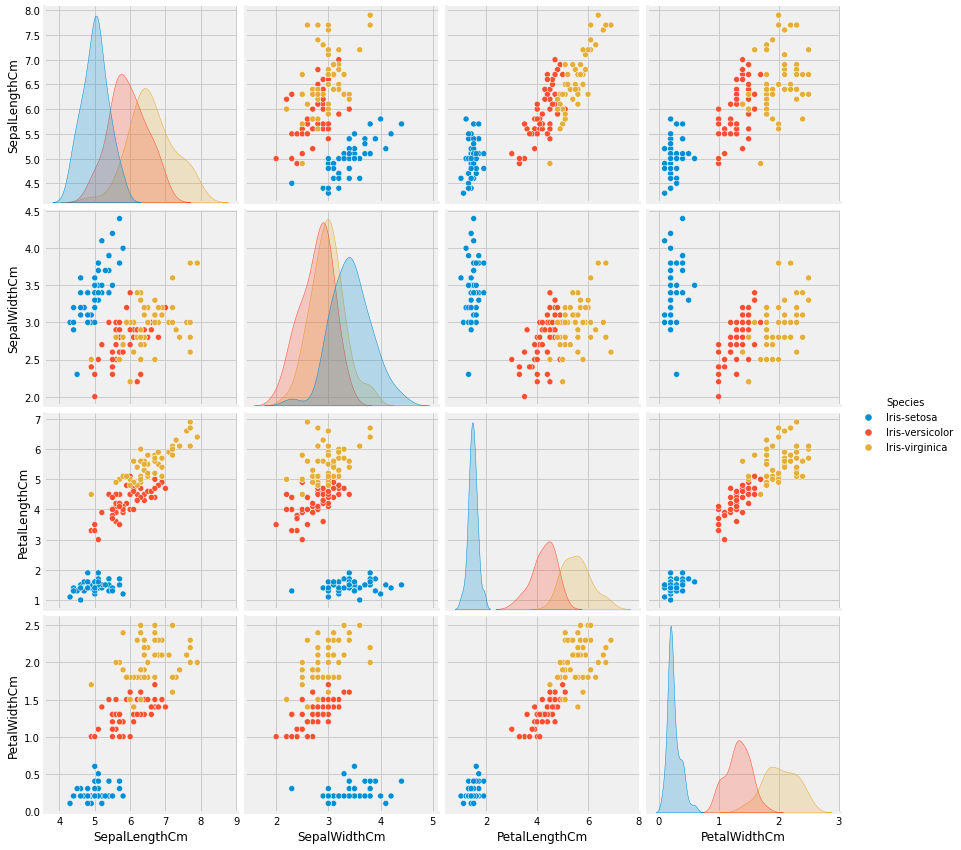

In [16]:
sns.pairplot(df, hue="Species", size=3)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

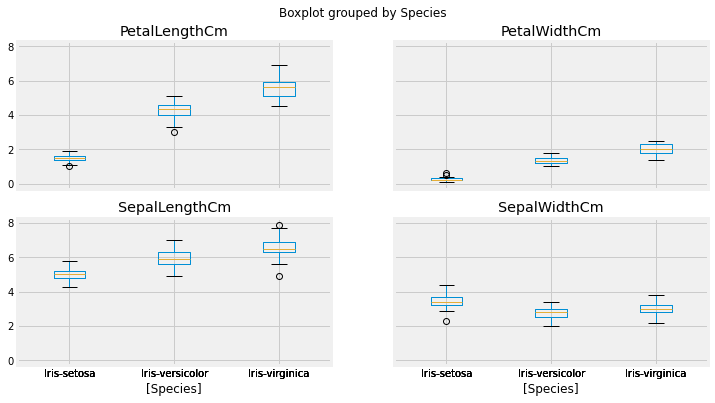

In [17]:
df.boxplot(by="Species", figsize=(12, 6))

<AxesSubplot:>

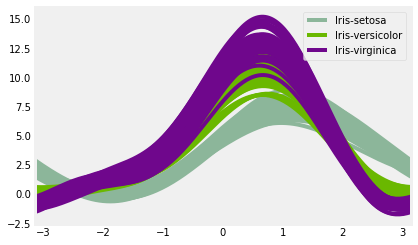

In [18]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1080x1080 with 0 Axes>

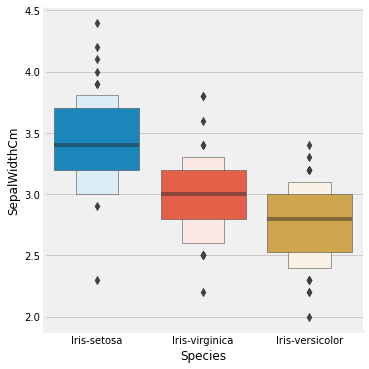

In [19]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

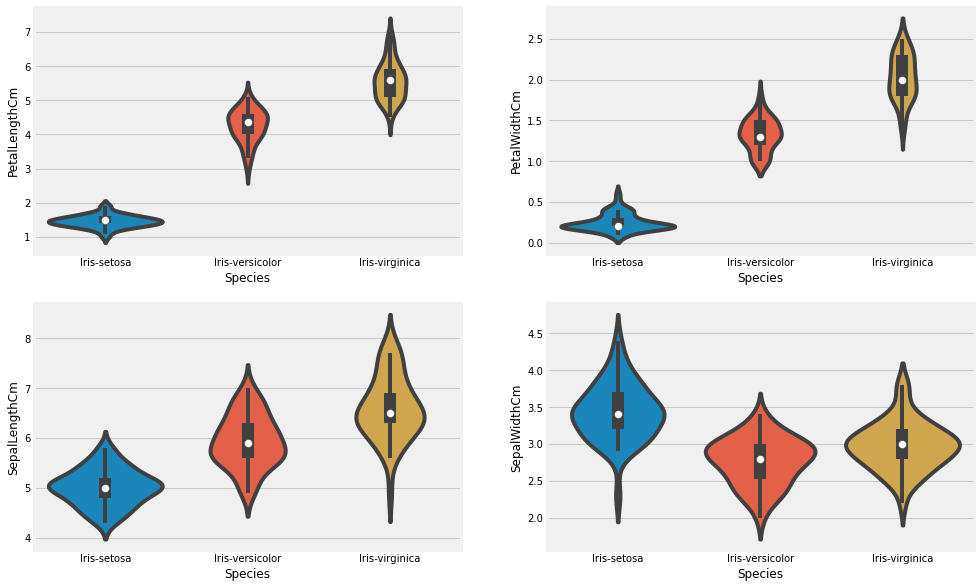

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [21]:
X=df.drop('Species',axis=1)
y=df['Species']

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [23]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [25]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))


Epoch 1/45
4/4 [==============================] - 0s 44ms/step - loss: 1.2385 - accuracy: 0.3333 - val_loss: 1.1552 - val_accuracy: 0.3111
Epoch 2/45
4/4 [==============================] - 0s 2ms/step - loss: 1.1379 - accuracy: 0.1667 - val_loss: 1.0826 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 4ms/step - loss: 1.0745 - accuracy: 0.3431 - val_loss: 1.0207 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 4ms/step - loss: 1.0249 - accuracy: 0.3529 - val_loss: 0.9796 - val_accuracy: 0.5556
Epoch 5/45
4/4 [==============================] - 0s 4ms/step - loss: 0.9859 - accuracy: 0.4608 - val_loss: 0.9413 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 4ms/step - loss: 0.9533 - accuracy: 0.6471 - val_loss: 0.9116 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 4ms/step - loss: 0.9227 - accuracy: 0.6569 - val_loss: 0.8813 - val_accuracy: 0.6667
Epoch 8/45
4/4 [=================

In [28]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 518us/step - loss: 0.4247 - accuracy: 0.8444


[0.4246547222137451, 0.8444444537162781]

In [29]:
pred = model.predict(X_test[:10])
print(pred)

[[0.00705909 0.32529706 0.66764385]
 [0.00421033 0.28300485 0.7127848 ]
 [0.08348133 0.50832146 0.40819722]
 [0.04363514 0.45794708 0.49841776]
 [0.91831535 0.06595291 0.01573169]
 [0.04933609 0.49140254 0.4592614 ]
 [0.00666542 0.28835404 0.7049805 ]
 [0.00702207 0.29744273 0.6955352 ]
 [0.9147027  0.06918842 0.01610888]
 [0.01366564 0.3860231  0.6003113 ]]


In [30]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 2 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [31]:
history.history['accuracy']

[0.3333333432674408,
 0.1666666716337204,
 0.343137264251709,
 0.3529411852359772,
 0.46078431606292725,
 0.6470588445663452,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.686274528503418,
 0.7156862616539001,
 0.686274528503418,
 0.656862735748291,
 0.6666666865348816,
 0.686274528503418,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.686274528503418,
 0.7450980544090271,
 0.8039215803146362,
 0.7745097875595093,
 0.7156862616539001,
 0.7745097875595093,
 0.8039215803146362,
 0.7745097875595093,
 0.8529411554336548,
 0.9607843160629272,
 0.9313725233078003,
 0.7352941036224365,
 0.6666666865348816,
 0.6764705777168274,
 0.7352941036224365,
 0.8921568393707275,
 0.9411764740943909,
 0.9313725233078003,
 0.970588207244873,
 0.8725489974021912,
 0.7941176295280457,
 0.8039215803146362,
 0.9019607901573181,
 0.9313725233078003,
 0.9509803652763367,
 0.9411764740943909,
 0.9019607901573181]

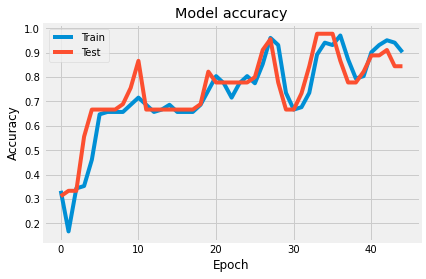

In [32]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()